### Evaluation Project -2

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

## Importing dataset 

In [11]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [12]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany


In [13]:
# checking the column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
# Unnamed columns contains the serial no which is not required for analysis, hence dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany


In [17]:
# Checking for the shape of the dataset
df.shape

(16468, 13)

In [18]:
# weremain with 16468 rows and 13 columns

In [20]:
# Checking for the null values
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [21]:
# we have 14951 null values in the dataset

In [23]:
# checking for the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [24]:
# we have 3 fields as objects and ramining as flot type

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [27]:
# Na values will have impact on the data modelling and to prevent the data loss filling the na values using median and mean methods
#filling na values for average price column using median 
df["AveragePrice"]=df["AveragePrice"].fillna(df["AveragePrice"].median())

#filling na values for total volume column using median
df["Total Volume"]=df["Total Volume"].fillna(df["Total Volume"].median())

#filling na values for 4046 column using median
df["4046"]=df["4046"].fillna(df["4046"].median())

#filling na values for 4225 column using median
df["4225"]=df["4225"].fillna(df["4225"].median())

#filling na values for 4225 column using median
df["4770"]=df["4770"].fillna(df["4770"].median())

In [28]:
# filling na values with column mean
#filing na values for Total bags column using mean
df=df.replace(np.NaN,df["Total Bags"].mean())

#filing na values for small bags column using mean
df=df.replace(np.NaN,df["Small Bags"].mean())

#filing na values for Large bags column using mean
df=df.replace(np.NaN,df["Large Bags"].mean())

#filing na values for Xlarge bags column using mean
df=df.replace(np.NaN,df["XLarge Bags"].mean())

In [29]:
# filling na fields for object type columns

df["type"].fillna(df["type"].mode()[0])

df["region"].fillna(df["region"].mode()[0])


0        Albany
1        Albany
2        Albany
3        Albany
4        Albany
          ...  
16463    293597
16464    293597
16465    293597
16466    293597
16467    293597
Name: region, Length: 16468, dtype: object

In [30]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [31]:
# Thus all the null values have been filled and now we can proceed for EDA

## EDA

In [33]:
# Comparative analysis to check the highest sales by year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

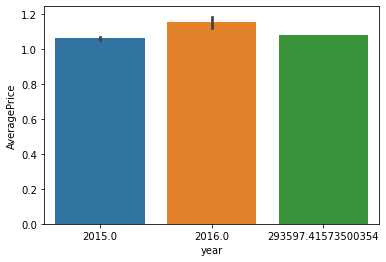

In [34]:
sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

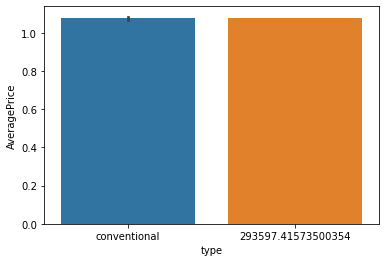

In [38]:
# Checking the data distribution as per type
sns.barplot(x="type",y="AveragePrice",data=df)

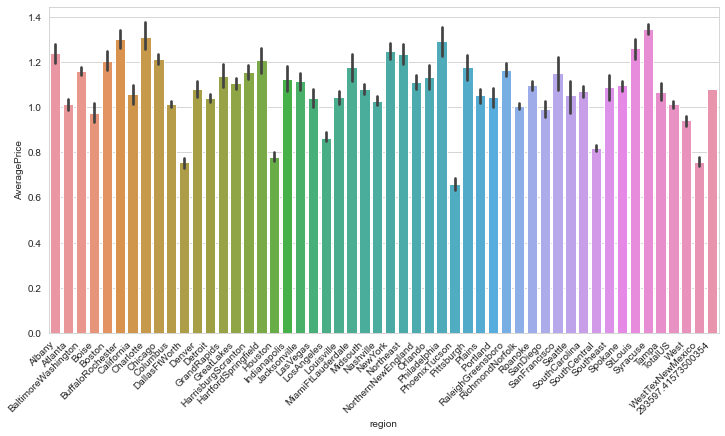

In [51]:
# Checking the data distribution as per region
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="region",y="AveragePrice",data=df,orient="v")
ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel('AveragePrice')
plt.show()

In [52]:
# Dropping the type, region and date columns which are not requred for linear regression
df.drop(["type","region","Date"],axis=1,inplace=True)

In [53]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0


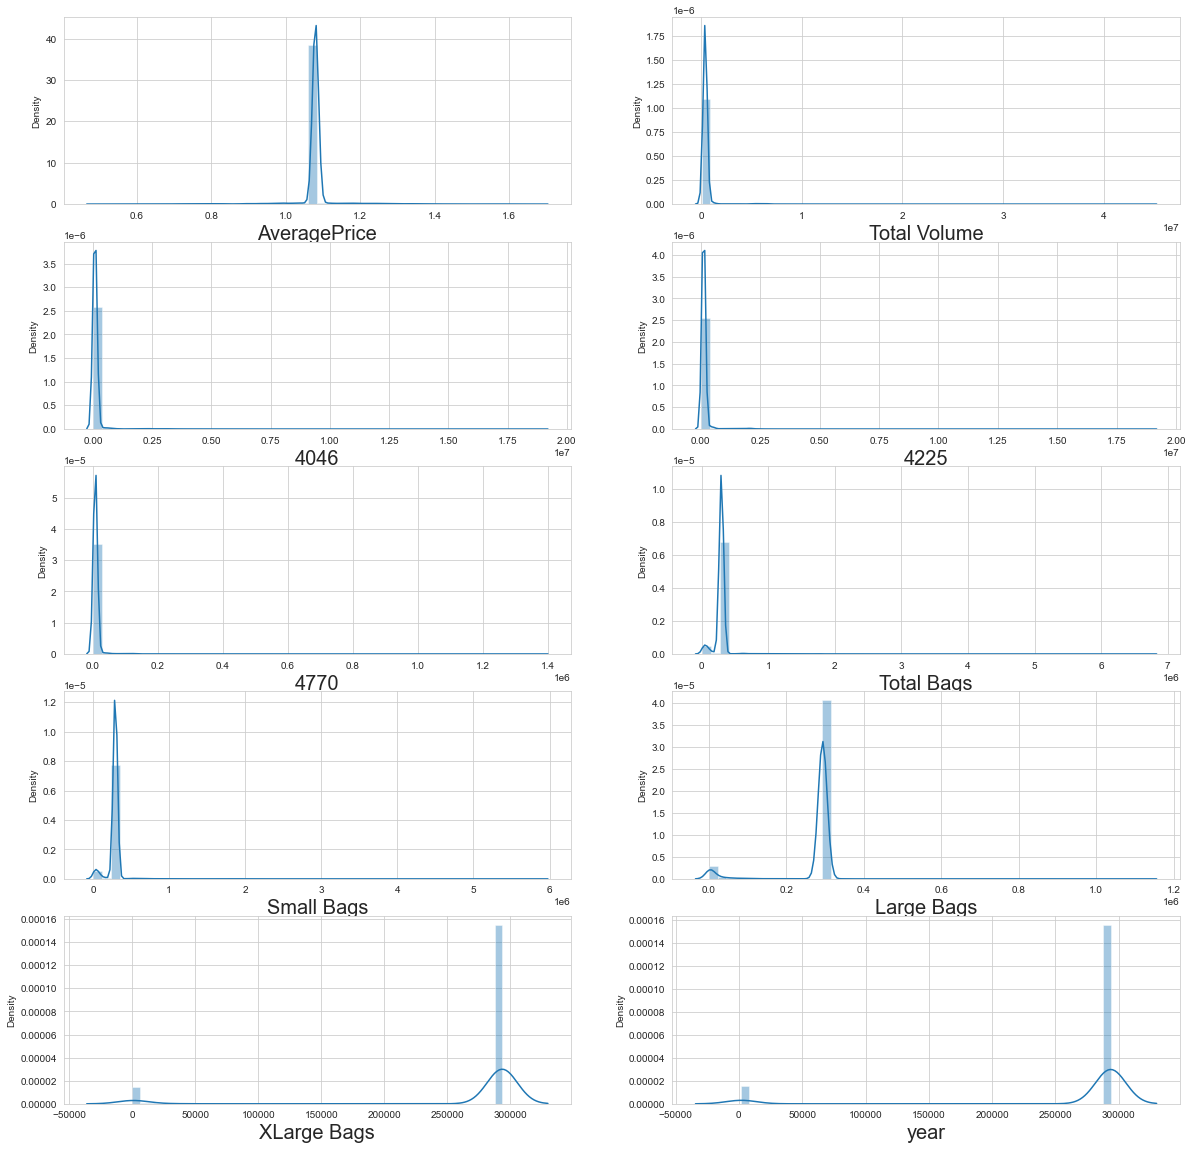

In [57]:
# Checking distribution for each column
plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=10:
        ax = plt.subplot(5,2,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltnumber +=1
plt.show()  #plt.show()

In [61]:
df.skew()

AveragePrice    -0.597853
Total Volume    20.780598
4046            20.223665
4225            21.202221
4770            18.212142
Total Bags      17.665207
Small Bags      16.895578
Large Bags      -2.217294
XLarge Bags     -2.824456
year            -2.821090
dtype: float64

AveragePrice       AxesSubplot(0.125,0.749828;0.352273x0.130172)
Total Volume    AxesSubplot(0.547727,0.749828;0.352273x0.130172)
4046               AxesSubplot(0.125,0.593621;0.352273x0.130172)
4225            AxesSubplot(0.547727,0.593621;0.352273x0.130172)
4770               AxesSubplot(0.125,0.437414;0.352273x0.130172)
Total Bags      AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Small Bags         AxesSubplot(0.125,0.281207;0.352273x0.130172)
Large Bags      AxesSubplot(0.547727,0.281207;0.352273x0.130172)
XLarge Bags           AxesSubplot(0.125,0.125;0.352273x0.130172)
year               AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

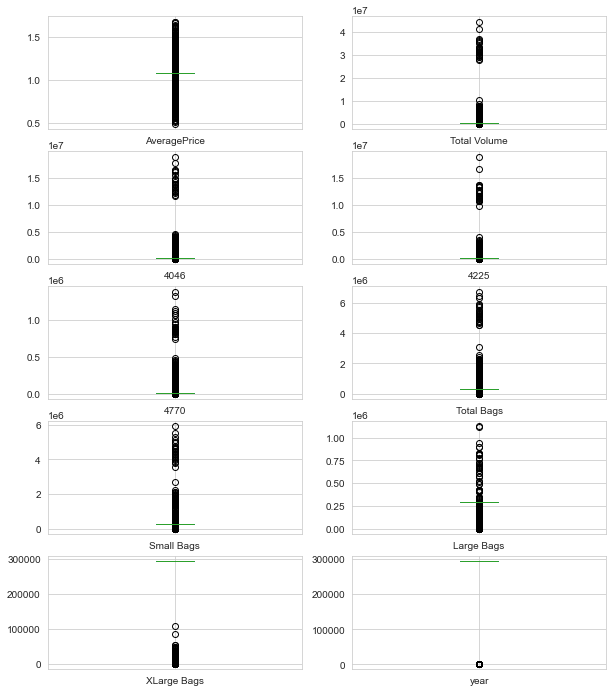

In [59]:
# Checking for the outliers
df.plot(kind="box",subplots=True,layout=(5,2),figsize=(10,12))



## Handling Outliers

In [62]:
# using z score method to remove outliers
# importing z score from scipy stats
from scipy.stats import zscore

In [63]:
z=np.abs(zscore(df))
z

array([[4.36879111, 0.32325445, 0.21650297, ..., 3.34000565, 3.16411771,
        3.13937068],
       [4.7176504 , 0.32999266, 0.21709419, ..., 3.33995328, 3.16411771,
        3.13937068],
       [2.60839475, 0.28439044, 0.21689777, ..., 3.33988348, 3.16411771,
        3.13937068],
       ...,
       [0.00804995, 0.0795209 , 0.08484768, ..., 0.28556381, 0.31842068,
        0.31853537],
       [0.00804995, 0.0795209 , 0.08484768, ..., 0.28556381, 0.31842068,
        0.31853537],
       [0.00804995, 0.0795209 , 0.08484768, ..., 0.28556381, 0.31842068,
        0.31853537]])

In [67]:
#setting the threshold value at 3
threshold=3
df_new=df[(z<3).all(axis=1)]

In [68]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
1517,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
1518,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
1519,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
1520,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
1521,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
...,...,...,...,...,...,...,...,...,...,...
16463,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16464,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16465,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16466,1.08,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735


In [69]:
df.shape

(16468, 10)

In [70]:
df_new.shape

(14951, 10)

In [72]:
# Percentage loss

p_loss=(16468-14951)/16468*100

In [73]:
p_loss

9.211804712169055

In [96]:
# Feature selection
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [97]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.870000,8603.620000,93.250000,0.000000,2015.000000
1,54876.98,674.28,44638.81,58.33,9505.560000,9408.070000,97.490000,0.000000,2015.000000
2,118220.22,794.70,109149.67,130.50,8145.350000,8042.210000,103.140000,0.000000,2015.000000
3,78992.15,1132.00,71976.41,72.58,5811.160000,5677.400000,133.760000,0.000000,2015.000000
4,51039.60,941.48,43838.39,75.78,6183.950000,5986.260000,197.690000,0.000000,2015.000000
...,...,...,...,...,...,...,...,...,...
16463,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16464,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16465,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735
16466,402791.86,81751.17,118664.89,7688.17,293597.415735,293597.415735,293597.415735,293597.415735,293597.415735


In [98]:
# Removing skewness from the columns using power transform method
#importing power transform from sklearn library
from sklearn.preprocessing import power_transform

In [99]:
x=power_transform(x,method="yeo-johnson")
x

array([[ 0.00000000e+00, -5.67142334e+00, -1.59724738e+00, ...,
        -3.04817768e+00, -3.15846401e+00, -3.13936876e+00],
       [ 0.00000000e+00, -6.17596344e+00, -2.02135640e+00, ...,
        -3.04817493e+00, -3.15846401e+00, -3.13936876e+00],
       [ 0.00000000e+00, -5.98433299e+00, -1.74385752e-01, ...,
        -3.04817118e+00, -3.15846401e+00, -3.13936876e+00],
       ...,
       [ 0.00000000e+00, -2.18844244e-03, -9.52684905e-03, ...,
         2.62085097e-01,  3.18457069e-01,  3.18535375e-01],
       [ 0.00000000e+00, -2.18844244e-03, -9.52684905e-03, ...,
         2.62085097e-01,  3.18457069e-01,  3.18535375e-01],
       [ 0.00000000e+00, -2.18844244e-03, -9.52684905e-03, ...,
         2.62085097e-01,  3.18457069e-01,  3.18535375e-01]])

In [100]:
# Scaling the data using standard scalar
x_scaled=StandardScaler().fit_transform(x)
print(x_scaled)

[[ 0.00000000e+00 -5.67142334e+00 -1.59724738e+00 ... -3.04817768e+00
  -3.15846401e+00 -3.13936876e+00]
 [ 0.00000000e+00 -6.17596344e+00 -2.02135640e+00 ... -3.04817493e+00
  -3.15846401e+00 -3.13936876e+00]
 [ 0.00000000e+00 -5.98433299e+00 -1.74385752e-01 ... -3.04817118e+00
  -3.15846401e+00 -3.13936876e+00]
 ...
 [ 0.00000000e+00 -2.18844244e-03 -9.52684905e-03 ...  2.62085097e-01
   3.18457069e-01  3.18535375e-01]
 [ 0.00000000e+00 -2.18844244e-03 -9.52684905e-03 ...  2.62085097e-01
   3.18457069e-01  3.18535375e-01]
 [ 0.00000000e+00 -2.18844244e-03 -9.52684905e-03 ...  2.62085097e-01
   3.18457069e-01  3.18535375e-01]]


In [103]:
# Builing maching learning model
# Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score


In [102]:
# finding the best random state number
best_rstate=0
accu=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predmod=mod.predict(x_test)
    tempaccu=r2_score(y_test,predmod)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f" best accuracy={accu*100} found on random_state{best_rstate}")
print("mean squared error:",mean_squared_error(y_test,predmod))
print("mean absolute error:",mean_absolute_error(y_test,predmod))

 best accuracy=42.87261876332577 found on random_state327
mean squared error: 0.0021655173894825153
mean absolute error: 0.010769003410800454


### Training the model

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=327)

### Finding the best model

In [107]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
cvscore=cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,preddtr))
print("mean absolute error:",mean_absolute_error(y_test,preddtr))

 accuracy=67.33777591660053,cross val score=56.11686145727677 & difference=11.220914459323765
mean squared error: 0.001136875126492613
mean absolute error: 0.007207043108740825


In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
r2score=r2_score(y_test,predgbr)
cvscore=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,predgbr))
print("mean absolute error:",mean_absolute_error(y_test,predgbr))

 accuracy=69.78477411681973,cross val score=64.80621997357753 & difference=4.9785541432422065
mean squared error: 0.0010517023782652406
mean absolute error: 0.007481897632702384


In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
cvscore=cross_val_score(KNeighborsRegressor(),x_train,y_train,cv=3).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,predknn))
print("mean absolute error:",mean_absolute_error(y_test,predknn))

 accuracy=81.14055864541182,cross val score=71.38946756927385 & difference=9.751091076137968
mean squared error: 0.000656441206233556
mean absolute error: 0.0056332726168791735


In [110]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error=",mean_squared_error(y_test,predad))
print("mean absolute error=",mean_absolute_error(y_test,predad))

 accuracy=55.18295143998009,cross val score=51.96055300471117 & difference=3.2223984352689143
mean squared error= 0.00155994850872982
mean absolute error= 0.009875991731458287


# KNeighborsRegressor gives the best score of R2 as well as cross validation score
# accuracy= 81 % & cross val score of 71.3 %

In [111]:
#saving the file
import pickle
filename="Avacado_price prediction.pkl"
pickle.dump(knn,open(filename,"wb"))

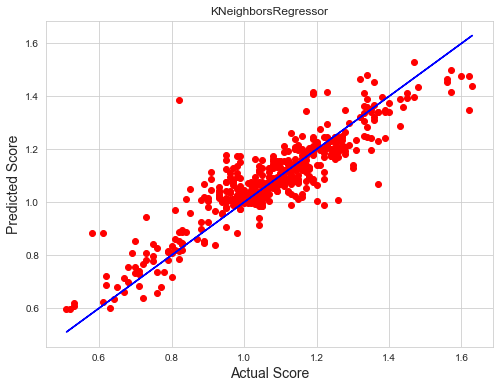

In [112]:
# Plotting knn regressor
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predknn,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Score",fontsize=14)
plt.ylabel("Predicted Score",fontsize=14)
plt.title("KNeighborsRegressor")
plt.show()